In [ ]:
#My student number is 991566501, so I am doing the classification problem for king-rook vs. king-pawn

!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.2

# TensorFlow and tf.keras
#import tensorflow as tf

# Helper libraries
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd

Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Successfully uninstalled scikit-learn-0.23.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)


In [ ]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/kr-vs-kp.data'

df = pd.read_csv(url)

df = df.rename(columns={"f": "b1", "f.1": "b2", "f.2": "b3", "f.3": "b4", "f.4": "b5", "f.5": "b6", "f.6": "b7", "f.7": "b8", "f.8": "b9", "f.9": "b10", "f.10": "b11"
, "f.11": "b12", "f.12": "b13", "l": "b14", "f.13": "b15", "f.14": "b16", "n": "b17", "t": "b18", "f.15": "b19", "f.16": "b20", "f.17": "b21", "f.18": "b22", "f.19": "b23"
, "f.20": "b24", "f.21": "b25", "t.1": "b26", "f.22": "b27", "f.23": "b28", "f.24": "b29", "f.25": "b30", "f.26": "b31", "f.27": "b32", "f.28": "b33", "t.2": "b34"
, "t.3": "b35", "n.1": "b36", "won": "win"})

print (df.head);

<bound method NDFrame.head of      b1 b2 b3 b4 b5 b6 b7 b8 b9 b10  ... b28 b29 b30 b31 b32 b33 b34 b35 b36  \
0     f  f  f  f  t  f  f  f  f   f  ...   f   f   f   f   f   f   t   t   n   
1     f  f  f  f  t  f  t  f  f   f  ...   f   f   f   f   f   f   t   t   n   
2     f  f  f  f  f  f  f  f  t   f  ...   f   f   f   f   f   f   t   t   n   
3     f  f  f  f  f  f  f  f  f   f  ...   f   f   f   f   f   f   t   t   n   
4     f  f  f  f  f  f  f  f  f   f  ...   f   f   t   f   f   f   t   t   n   
...  .. .. .. .. .. .. .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3190  t  f  f  f  f  f  t  f  f   f  ...   f   t   f   f   t   f   t   f   n   
3191  t  f  f  f  f  f  t  f  f   f  ...   f   t   f   f   t   f   t   f   n   
3192  t  f  f  f  f  f  t  f  f   f  ...   f   t   f   f   t   f   t   f   n   
3193  t  f  t  f  f  f  t  f  f   f  ...   f   t   f   f   t   f   f   f   n   
3194  t  f  t  f  f  f  t  f  f   f  ...   f   t   f   f   t   f   f   f   n   

        w

In [ ]:
from sklearn.preprocessing import OneHotEncoder

for i in range(36):
  name = "b" + str(i+1)
  df = pd.concat([pd.get_dummies(df[name],prefix=name, drop_first=True), df], axis = 1)
  df.drop([name],axis=1, inplace=True)

df = pd.concat([pd.get_dummies(df["win"],prefix="", drop_first=True), df], axis = 1)
df.drop(["win"],axis=1, inplace=True)

print(df)

      _won  b36_t  b35_t  b34_t  b33_t  b32_t  b31_t  b30_t  b29_t  b28_t  \
0        1      0      1      1      0      0      0      0      0      0   
1        1      0      1      1      0      0      0      0      0      0   
2        1      0      1      1      0      0      0      0      0      0   
3        1      0      1      1      0      0      0      0      0      0   
4        1      0      1      1      0      0      0      1      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3190     0      0      0      1      0      1      0      0      1      0   
3191     0      0      0      1      0      1      0      0      1      0   
3192     0      0      0      1      0      1      0      0      1      0   
3193     0      0      0      0      0      1      0      0      1      0   
3194     0      0      0      0      0      1      0      0      1      0   

      ...  b10_t  b9_t  b8_t  b7_t  b6_t  b5_t  b4_t  b3_t  b2_t  b1_t  
0 

In [ ]:
Y = df["_won"]
X = df
X.drop(["_won"],axis=1, inplace=True)

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2876, 38)
Unseen Data For Predictions: (319, 38)


In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = '_won', session_id=123) 

,Description,Value
0,session_id,123
1,Target,_won
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2876, 38)"
5,Missing Values,False
6,Numeric Features,37
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='_won',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9886,0.9884,0.9923,0.9860,0.9891,0.9771,0.9773,0.020
lightgbm,Light Gradient Boosting Machine,0.9886,0.9995,0.9904,0.9877,0.9890,0.9771,0.9772,0.137
et,Extra Trees Classifier,0.9866,0.9976,0.9885,0.9858,0.9871,0.9731,0.9733,0.509
rf,Random Forest Classifier,0.9836,0.9978,0.9827,0.9857,0.9842,0.9672,0.9673,0.520
gbc,Gradient Boosting Classifier,0.9732,0.9966,0.9732,0.9754,0.9741,0.9463,0.9465,0.210
ada,Ada Boost Classifier,0.9612,0.9941,0.9712,0.9552,0.9630,0.9223,0.9228,0.147
lr,Logistic Regression,0.9573,0.9923,0.9616,0.9565,0.9589,0.9144,0.9147,0.343
svm,SVM - Linear Kernel,0.9553,0.0000,0.9616,0.9539,0.9571,0.9104,0.9118,0.020
ridge,Ridge Classifier,0.9399,0.0000,0.9549,0.9312,0.9428,0.8795,0.8801,0.016
lda,Linear Discriminant Analysis,0.9394,0.9844,0.9549,0.9304,0.9423,0.8785,0.8792,0.026


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9752,0.9746,0.9905,0.9630,0.9765,0.9504,0.9508
2,0.9851,0.9857,0.9714,1.0000,0.9855,0.9703,0.9707
3,0.9751,0.9742,1.0000,0.9541,0.9765,0.9501,0.9513
4,0.9851,0.9849,0.9904,0.9810,0.9856,0.9701,0.9702
5,0.9851,0.9849,0.9904,0.9810,0.9856,0.9701,0.9702
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9900,0.9900,0.9904,0.9904,0.9904,0.9801,0.9801


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9406,0.9871,0.9429,0.9429,0.9429,0.8810,0.8810
1,0.9455,0.9957,0.9048,0.9896,0.9453,0.8913,0.8948
2,0.9307,0.9824,0.8952,0.9691,0.9307,0.8616,0.8643
3,0.9104,0.9907,0.9712,0.8707,0.9182,0.8199,0.8259
4,0.9403,0.9904,0.9038,0.9792,0.9400,0.8808,0.8836
5,0.9254,0.9884,0.9712,0.8938,0.9309,0.8501,0.8536
6,0.9453,0.9928,0.9135,0.9794,0.9453,0.8907,0.8928
7,0.9254,0.9866,0.9135,0.9406,0.9268,0.8507,0.8511
8,0.9154,0.9881,0.8558,0.9780,0.9128,0.8314,0.8384


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


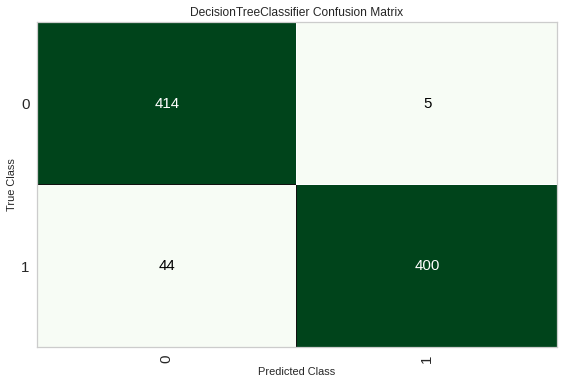

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot = 'confusion_matrix')

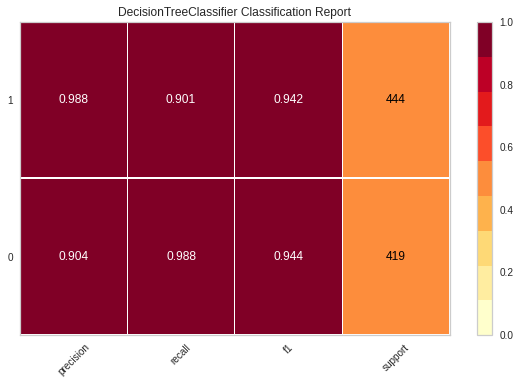

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot = 'class_report')

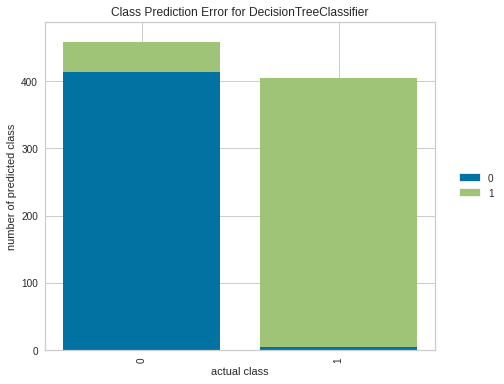

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_dt, plot = 'error')

In [ ]:
predict_model(tuned_dt);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9432,0.9917,0.9009,0.9877,0.9423,0.8866,0.8903


In [ ]:
final_knn = finalize_model(tuned_dt)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='depr

In [ ]:
print(final_knn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9561,0.9925,0.9392,0.9827,0.9605,0.9112,0.9124


,_won,b36_t,b35_t,b34_t,b33_t,b32_t,b31_t,b30_t,b29_t,b28_t,...,b8_t,b7_t,b6_t,b5_t,b4_t,b3_t,b2_t,b1_t,Label,Score
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.8936
1,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.8936
2,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0.8936
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.8936
4,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.8936
